In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import LocalOutlierFactor
from catboost import CatBoostClassifier
from imblearn.combine import SMOTETomek
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report

In [38]:
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [39]:
data.duplicated().sum()

0

In [40]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Axes: xlabel='Age', ylabel='Count'>

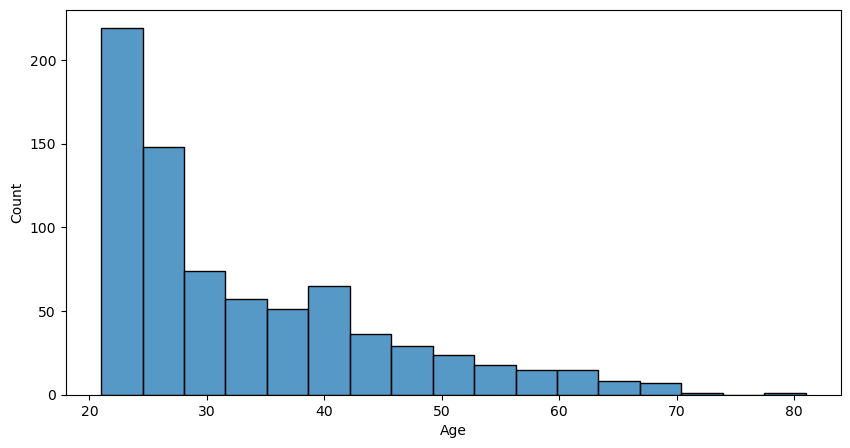

In [41]:
plt.figure(figsize=(10,5))
sns.histplot(data['Age'])

In [44]:
skin_mean = data[data['SkinThickness'] != 0 ]['SkinThickness'].mean()
data['SkinThickness'].replace(0 , skin_mean , inplace = True)

C:\Users\T A T\AppData\Local\Temp\ipykernel_14324\3074209417.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['SkinThickness'].replace(0 , skin_mean , inplace = True)


<Axes: xlabel='SkinThickness', ylabel='Count'>

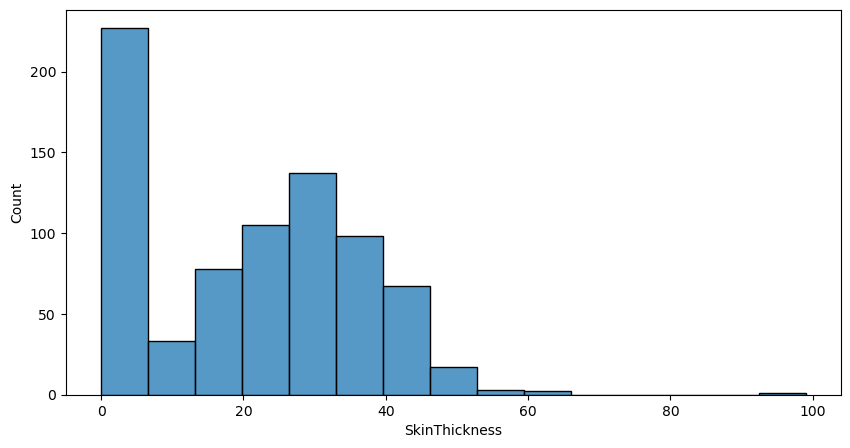

In [42]:
plt.figure(figsize=(10,5))
sns.histplot(data['SkinThickness'])

In [47]:
insulin_mean = data[data['Insulin'] != 0]['Insulin'].mean()
data['Insulin'].replace(0, insulin_mean, inplace=True)

C:\Users\T A T\AppData\Local\Temp\ipykernel_14324\1250209174.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Insulin'].replace(0, insulin_mean, inplace=True)


<Axes: xlabel='Insulin', ylabel='Count'>

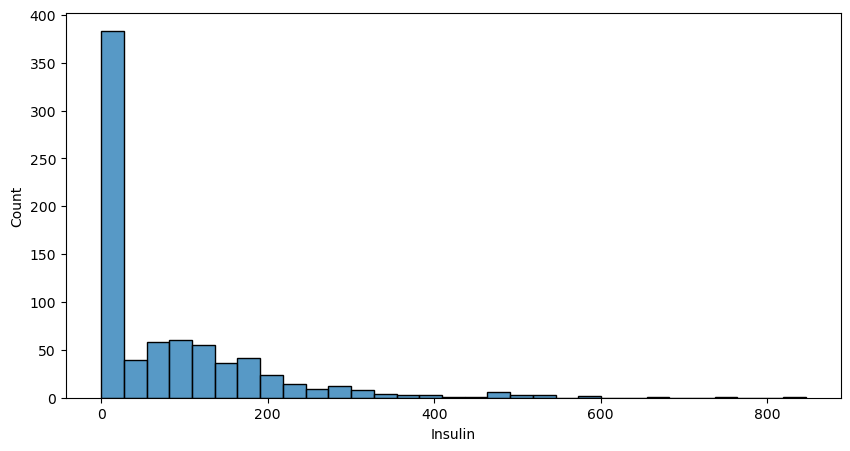

In [45]:
plt.figure(figsize=(10,5))
sns.histplot(data['Insulin'])

In [49]:
glucose_mean = data[data['Glucose'] != 0]['Glucose'].mean()
data['Glucose'].replace(0, glucose_mean, inplace=True)

C:\Users\T A T\AppData\Local\Temp\ipykernel_14324\3156138759.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Glucose'].replace(0, glucose_mean, inplace=True)


<Axes: xlabel='Glucose', ylabel='Count'>

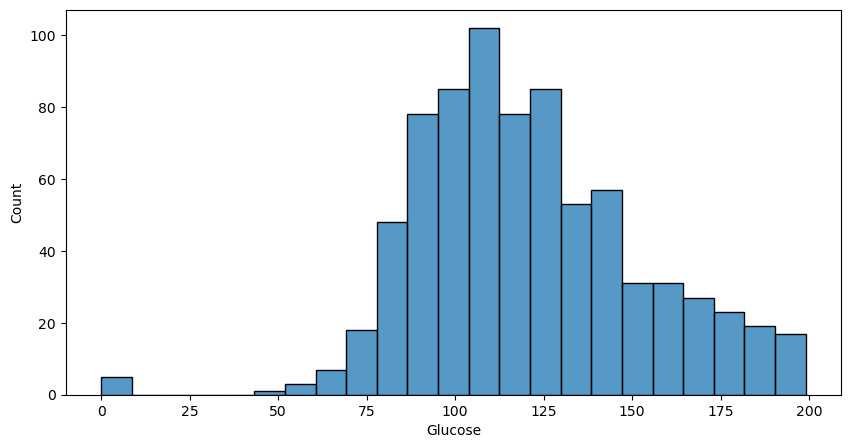

In [48]:
plt.figure(figsize=(10,5))
sns.histplot(data['Glucose'])

In [52]:
bloodpressure_mean = data[data['BloodPressure'] != 0]['BloodPressure'].mean()
data['BloodPressure'].replace(0, bloodpressure_mean, inplace=True)

C:\Users\T A T\AppData\Local\Temp\ipykernel_14324\1663207598.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['BloodPressure'].replace(0, bloodpressure_mean, inplace=True)


<Axes: xlabel='BloodPressure', ylabel='Count'>

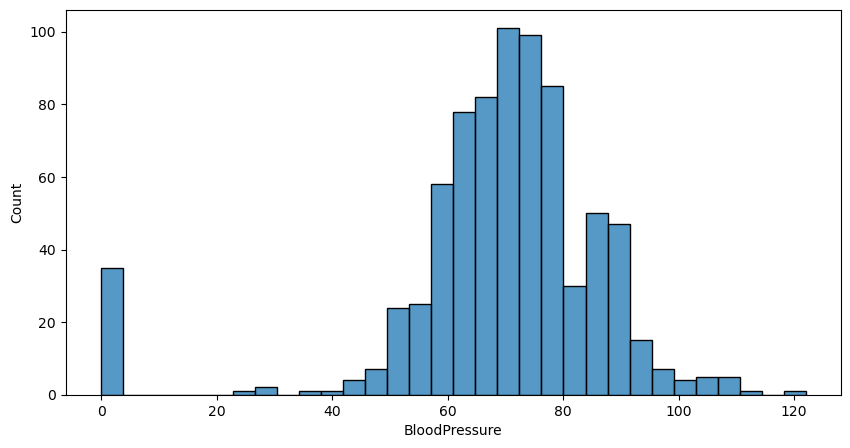

In [51]:
plt.figure(figsize=(10,5))
sns.histplot(data['BloodPressure'])

In [55]:
bmi_mean = data[data['BMI'] != 0]['BMI'].mean()
data['BMI'].replace(0, bmi_mean, inplace=True) 

C:\Users\T A T\AppData\Local\Temp\ipykernel_14324\3038668964.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['BMI'].replace(0, bmi_mean, inplace=True)


<Axes: xlabel='BMI', ylabel='Count'>

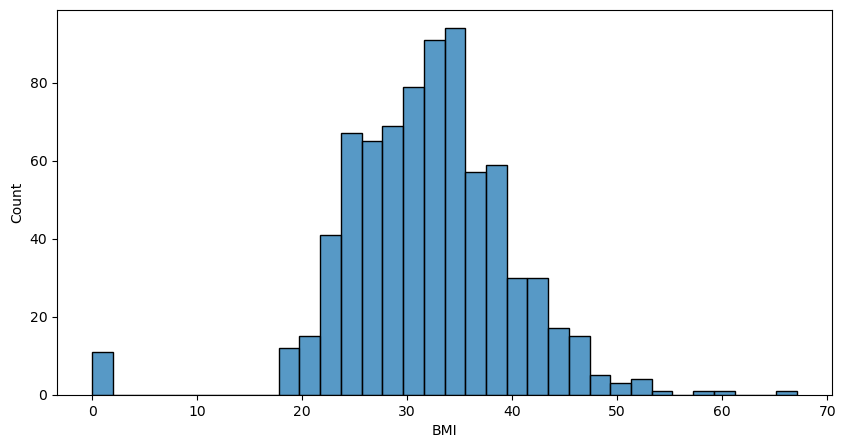

In [54]:
plt.figure(figsize=(10,5))
sns.histplot(data['BMI'])

In [57]:
scaler = MinMaxScaler()
data.iloc[:,:-1] = scaler.fit_transform(data.iloc[:,:-1])

C:\Users\T A T\AppData\Local\Temp\ipykernel_14324\2193644964.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.35294118 0.05882353 0.47058824 0.05882353 0.         0.29411765
 0.17647059 0.58823529 0.11764706 0.47058824 0.23529412 0.58823529
 0.58823529 0.05882353 0.29411765 0.41176471 0.         0.41176471
 0.05882353 0.05882353 0.17647059 0.47058824 0.41176471 0.52941176
 0.64705882 0.58823529 0.41176471 0.05882353 0.76470588 0.29411765
 0.29411765 0.17647059 0.17647059 0.35294118 0.58823529 0.23529412
 0.64705882 0.52941176 0.11764706 0.23529412 0.17647059 0.41176471
 0.41176471 0.52941176 0.41176471 0.         0.05882353 0.11764706
 0.41176471 0.41176471 0.05882353 0.05882353 0.29411765 0.47058824
 0.41176471 0.05882353 0.41176471 0.         0.         0.
 0.11764706 0.47058824 0.29411765 0.11764706 0.41176471 0.29411765
 0.         0.11764706 0.05882353 0.23529412 0.11764706 0.29411765
 0.76470588 0.23529

In [60]:
X = data.drop(columns ='Outcome')
y = data.Outcome

In [71]:
x_train , x_test , y_train , y_test = train_test_split(X , y , test_size=0.3 , random_state=42)
svc = SVC(kernel='linear')
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       151
           1       0.65      0.57      0.61        80

    accuracy                           0.74       231
   macro avg       0.72      0.70      0.71       231
weighted avg       0.74      0.74      0.74       231



In [77]:
knn = KNeighborsClassifier(n_neighbors=4 )
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.87      0.81       151
           1       0.65      0.46      0.54        80

    accuracy                           0.73       231
   macro avg       0.70      0.67      0.67       231
weighted avg       0.72      0.73      0.71       231



In [76]:
np.unique(data['Outcome'] , return_counts = True)

(array([0, 1], dtype=int64), array([500, 268], dtype=int64))

In [86]:
gbc = GradientBoostingClassifier(n_estimators=300 , learning_rate=0.05 , max_depth=3)
gbc.fit(x_train, y_train)
y_pred = gbc.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.78      0.80       151
           1       0.62      0.66      0.64        80

    accuracy                           0.74       231
   macro avg       0.72      0.72      0.72       231
weighted avg       0.75      0.74      0.74       231



In [94]:
rfc = RandomForestClassifier(n_estimators=200 , class_weight={0:1,1:2})
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.82      0.82       151
           1       0.67      0.68      0.67        80

    accuracy                           0.77       231
   macro avg       0.75      0.75      0.75       231
weighted avg       0.77      0.77      0.77       231



In [ ]:
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80       151
           1       0.62      0.70      0.65        80

    accuracy                           0.74       231
   macro avg       0.72      0.73      0.73       231
weighted avg       0.75      0.74      0.75       231



In [110]:
cat = CatBoostClassifier(learning_rate=0.05, depth=5, iterations=300 , eval_metric='Recall',class_weights=[1, 1.5] ,random_seed=42)
cat.fit(x_train , y_train , eval_set=(x_test , y_test))

0:	learn: 0.6702128	test: 0.6250000	best: 0.6250000 (0)	total: 2.68ms	remaining: 802ms
1:	learn: 0.5957447	test: 0.5875000	best: 0.6250000 (0)	total: 5ms	remaining: 744ms
2:	learn: 0.6914894	test: 0.6500000	best: 0.6500000 (2)	total: 7.12ms	remaining: 705ms
3:	learn: 0.6861702	test: 0.6625000	best: 0.6625000 (3)	total: 9.83ms	remaining: 728ms
4:	learn: 0.7180851	test: 0.6750000	best: 0.6750000 (4)	total: 11.4ms	remaining: 675ms
5:	learn: 0.7127660	test: 0.6625000	best: 0.6750000 (4)	total: 13.2ms	remaining: 645ms
6:	learn: 0.7074468	test: 0.6625000	best: 0.6750000 (4)	total: 14.6ms	remaining: 611ms
7:	learn: 0.6968085	test: 0.6500000	best: 0.6750000 (4)	total: 15.9ms	remaining: 579ms
8:	learn: 0.6968085	test: 0.6625000	best: 0.6750000 (4)	total: 17ms	remaining: 551ms
9:	learn: 0.7021277	test: 0.6500000	best: 0.6750000 (4)	total: 18.3ms	remaining: 531ms
10:	learn: 0.7180851	test: 0.6625000	best: 0.6750000 (4)	total: 19.4ms	remaining: 509ms
11:	learn: 0.7180851	test: 0.6500000	best: 0.67

In [111]:
y_pred = cat.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.74      0.80       151
           1       0.62      0.79      0.69        80

    accuracy                           0.76       231
   macro avg       0.74      0.76      0.75       231
weighted avg       0.78      0.76      0.76       231



In [127]:
lof = LocalOutlierFactor()
y_pred = lof.fit_predict(data)
# data[y_pred == 1]

In [128]:
len(y_pred[y_pred == -1])

24

In [129]:
y_pred[y_pred == 1] = 0 
y_pred[y_pred == -1] = 1

In [132]:
df = data[y_pred==0]

In [133]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.670968,0.489796,0.304348,0.170130,0.314928,0.234415,0.483333,1
1,0.058824,0.264516,0.428571,0.239130,0.170130,0.171779,0.116567,0.166667,0
2,0.470588,0.896774,0.408163,0.240798,0.170130,0.104294,0.253629,0.183333,1
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,0
5,0.294118,0.464516,0.510204,0.240798,0.170130,0.151329,0.052519,0.150000,0


In [140]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
x_train , x_test , y_train , y_test = train_test_split(X,y,test_size=0.3,random_state=42)
cat = CatBoostClassifier(learning_rate=0.05, depth=5, iterations=300 , eval_metric='Recall' ,random_seed=42)
cat.fit(x_train , y_train , eval_set=(x_test , y_test))

0:	learn: 0.5212766	test: 0.4625000	best: 0.4625000 (0)	total: 2.15ms	remaining: 644ms
1:	learn: 0.5372340	test: 0.5000000	best: 0.5000000 (1)	total: 4.23ms	remaining: 630ms
2:	learn: 0.5531915	test: 0.5500000	best: 0.5500000 (2)	total: 6.91ms	remaining: 684ms
3:	learn: 0.5212766	test: 0.5000000	best: 0.5500000 (2)	total: 8.66ms	remaining: 641ms
4:	learn: 0.5212766	test: 0.5250000	best: 0.5500000 (2)	total: 10.6ms	remaining: 625ms
5:	learn: 0.5000000	test: 0.5250000	best: 0.5500000 (2)	total: 13.2ms	remaining: 648ms
6:	learn: 0.4946809	test: 0.5250000	best: 0.5500000 (2)	total: 15.2ms	remaining: 634ms
7:	learn: 0.5159574	test: 0.5125000	best: 0.5500000 (2)	total: 16.7ms	remaining: 608ms
8:	learn: 0.5159574	test: 0.5000000	best: 0.5500000 (2)	total: 18.2ms	remaining: 590ms
9:	learn: 0.5212766	test: 0.5125000	best: 0.5500000 (2)	total: 19.8ms	remaining: 575ms
10:	learn: 0.5265957	test: 0.5125000	best: 0.5500000 (2)	total: 21.3ms	remaining: 560ms
11:	learn: 0.5372340	test: 0.5375000	best:

In [141]:
y_pred = cat.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       151
           1       0.66      0.69      0.67        80

    accuracy                           0.77       231
   macro avg       0.75      0.75      0.75       231
weighted avg       0.77      0.77      0.77       231



In [165]:
sm = SMOTETomek(sampling_strategy='minority', random_state=42)
X_sm, y_sm = sm.fit_resample(X, y)
X_sm.shape, y_sm.shape

((962, 8), (962,))

In [166]:
len(data)

768

In [167]:
x_train , x_test , y_train , y_test = train_test_split(X_sm , y_sm , test_size = 0.3 , random_state = 42)
cat = CatBoostClassifier(learning_rate=0.05, depth=5, iterations=300 , eval_metric='Recall' ,random_seed=42)
cat.fit(x_train , y_train , eval_set=(x_test , y_test))

0:	learn: 0.7371429	test: 0.6488550	best: 0.6488550 (0)	total: 5.95ms	remaining: 1.78s
1:	learn: 0.8171429	test: 0.7251908	best: 0.7251908 (1)	total: 10.8ms	remaining: 1.61s
2:	learn: 0.8171429	test: 0.7328244	best: 0.7328244 (2)	total: 15ms	remaining: 1.49s
3:	learn: 0.8714286	test: 0.7862595	best: 0.7862595 (3)	total: 18.2ms	remaining: 1.35s
4:	learn: 0.8828571	test: 0.7862595	best: 0.7862595 (3)	total: 21.6ms	remaining: 1.27s
5:	learn: 0.8714286	test: 0.8015267	best: 0.8015267 (5)	total: 23.9ms	remaining: 1.17s
6:	learn: 0.8771429	test: 0.8015267	best: 0.8015267 (5)	total: 27.1ms	remaining: 1.14s
7:	learn: 0.8742857	test: 0.8244275	best: 0.8244275 (7)	total: 28.9ms	remaining: 1.05s
8:	learn: 0.8857143	test: 0.8244275	best: 0.8244275 (7)	total: 30.4ms	remaining: 983ms
9:	learn: 0.8828571	test: 0.8320611	best: 0.8320611 (9)	total: 31.9ms	remaining: 925ms
10:	learn: 0.8942857	test: 0.8625954	best: 0.8625954 (10)	total: 33.3ms	remaining: 875ms
11:	learn: 0.8800000	test: 0.8320611	best: 

In [168]:
y_pred = cat.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.78      0.83       158
           1       0.77      0.88      0.82       131

    accuracy                           0.83       289
   macro avg       0.83      0.83      0.83       289
weighted avg       0.83      0.83      0.83       289



In [169]:
print(confusion_matrix(y_test,y_pred))

[[124  34]
 [ 16 115]]


Text(0.5, 1.0, 'feature importance in random forest model')

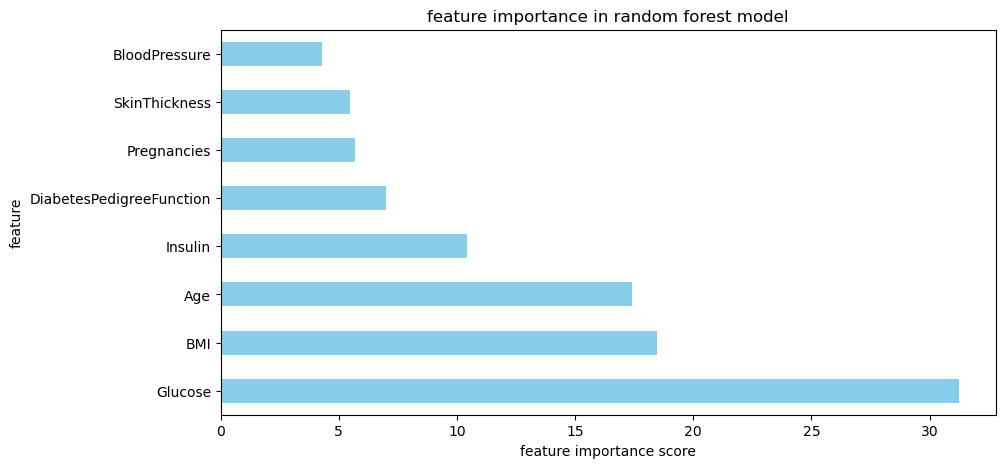

In [170]:
x_train = pd.DataFrame(x_train)
feature_importances = pd.Series(cat.feature_importances_ , index=x_train.columns)
feature_importances.sort_values(ascending=False).plot(kind='barh', color = 'skyblue', figsize=(10, 5))
plt.xlabel('feature importance score')
plt.ylabel('feature')
plt.title('feature importance in random forest model')

In [179]:
gbc = GradientBoostingClassifier(learning_rate=0.05 , max_depth=5 , n_estimators=1000 , random_state=42)
gbc.fit(x_train, y_train)
y_pred = gbc.predict(x_test)
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85       158
           1       0.81      0.82      0.82       131

    accuracy                           0.83       289
   macro avg       0.83      0.83      0.83       289
weighted avg       0.83      0.83      0.83       289



Text(0.5, 1.0, 'feature importance in random forest model')

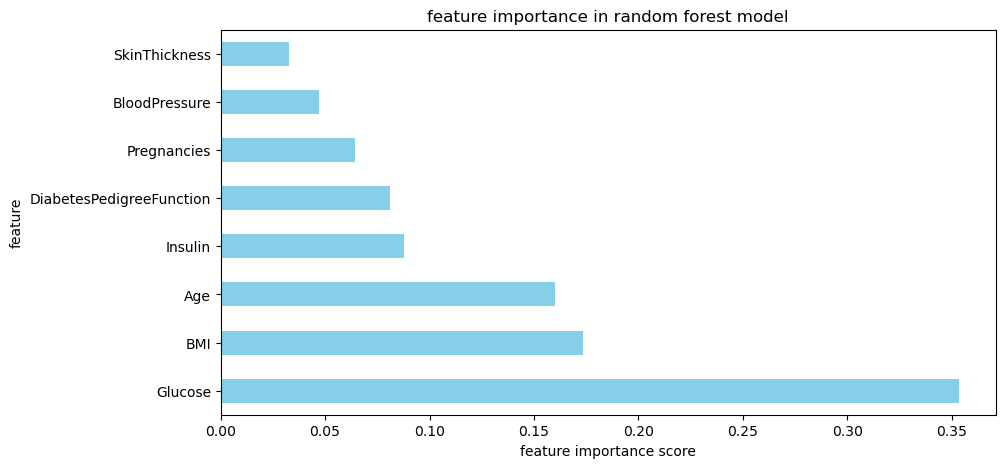

In [180]:
x_train = pd.DataFrame(x_train)
feature_importances = pd.Series(gbc.feature_importances_ , index=x_train.columns)
feature_importances.sort_values(ascending=False).plot(kind='barh', color = 'skyblue', figsize=(10, 5))
plt.xlabel('feature importance score')
plt.ylabel('feature')
plt.title('feature importance in random forest model')

In [ ]:
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.85      0.80      0.82       158
           1       0.78      0.82      0.80       131

    accuracy                           0.81       289
   macro avg       0.81      0.81      0.81       289
weighted avg       0.82      0.81      0.81       289



Text(0.5, 1.0, 'feature importance in random forest model')

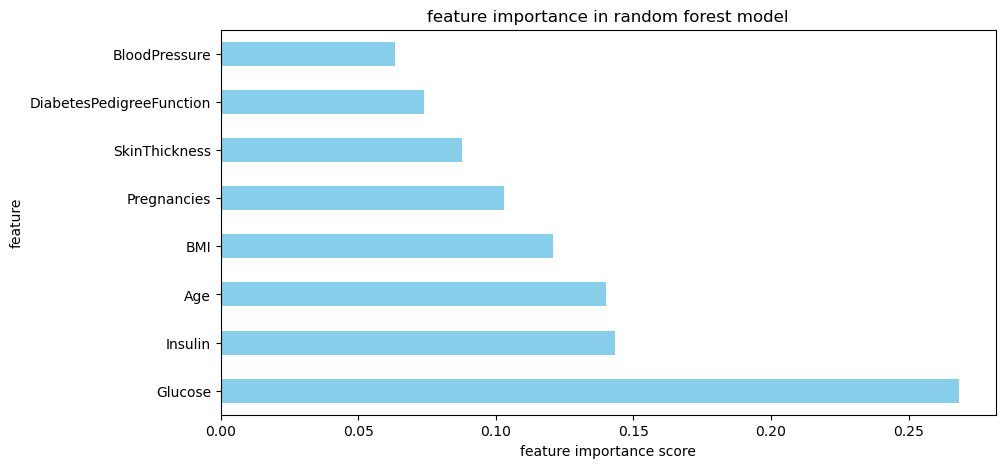

In [182]:
x_train = pd.DataFrame(x_train)
feature_importances = pd.Series(xgb.feature_importances_ , index=x_train.columns)
feature_importances.sort_values(ascending=False).plot(kind='barh', color = 'skyblue', figsize=(10, 5))
plt.xlabel('feature importance score')
plt.ylabel('feature')
plt.title('feature importance in random forest model')

In [183]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.670968,0.489796,0.304348,0.170130,0.314928,0.234415,0.483333,1
1,0.058824,0.264516,0.428571,0.239130,0.170130,0.171779,0.116567,0.166667,0
2,0.470588,0.896774,0.408163,0.240798,0.170130,0.104294,0.253629,0.183333,1
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,0
5,0.294118,0.464516,0.510204,0.240798,0.170130,0.151329,0.052519,0.150000,0
...,...,...,...,...,...,...,...,...,...
763,0.588235,0.367742,0.530612,0.445652,0.199519,0.300613,0.039710,0.700000,0
764,0.117647,0.503226,0.469388,0.217391,0.170130,0.380368,0.111870,0.100000,0
765,0.294118,0.496774,0.489796,0.173913,0.117788,0.163599,0.071307,0.150000,0
766,0.058824,0.529032,0.367347,0.240798,0.170130,0.243354,0.115713,0.433333,1


In [186]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [187]:
sm = SMOTETomek(sampling_strategy='minority', random_state=42)
X_sm, y_sm = sm.fit_resample(X, y)
X_sm.shape, y_sm.shape

((918, 8), (918,))

In [200]:
x_train , x_test , y_train , y_test = train_test_split(X_sm , y_sm , test_size = 0.3 , random_state = 42)
cat = CatBoostClassifier(learning_rate=0.05, depth=5, iterations=1000 , eval_metric='Recall' ,random_seed=42)
cat.fit(x_train , y_train , eval_set=(x_test , y_test))

0:	learn: 0.7196262	test: 0.6666667	best: 0.6666667 (0)	total: 1.41ms	remaining: 1.4s
1:	learn: 0.8068536	test: 0.7391304	best: 0.7391304 (1)	total: 2.74ms	remaining: 1.37s
2:	learn: 0.7757009	test: 0.6884058	best: 0.7391304 (1)	total: 4.13ms	remaining: 1.37s
3:	learn: 0.8068536	test: 0.7318841	best: 0.7391304 (1)	total: 5.54ms	remaining: 1.38s
4:	learn: 0.8224299	test: 0.7681159	best: 0.7681159 (4)	total: 7.29ms	remaining: 1.45s
5:	learn: 0.8037383	test: 0.7753623	best: 0.7753623 (5)	total: 8.62ms	remaining: 1.43s
6:	learn: 0.8193146	test: 0.7753623	best: 0.7753623 (5)	total: 9.97ms	remaining: 1.41s
7:	learn: 0.8317757	test: 0.8043478	best: 0.8043478 (7)	total: 12ms	remaining: 1.49s
8:	learn: 0.8317757	test: 0.7898551	best: 0.8043478 (7)	total: 13.2ms	remaining: 1.45s
9:	learn: 0.8224299	test: 0.7898551	best: 0.8043478 (7)	total: 14.5ms	remaining: 1.43s
10:	learn: 0.8286604	test: 0.7898551	best: 0.8043478 (7)	total: 15.7ms	remaining: 1.41s
11:	learn: 0.8380062	test: 0.7898551	best: 0.

In [201]:
y_pred = cat.predict(x_train)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93       321
           1       0.91      0.96      0.93       321

    accuracy                           0.93       642
   macro avg       0.93      0.93      0.93       642
weighted avg       0.93      0.93      0.93       642



In [202]:
y_pred = cat.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84       138
           1       0.84      0.85      0.84       138

    accuracy                           0.84       276
   macro avg       0.84      0.84      0.84       276
weighted avg       0.84      0.84      0.84       276



In [190]:
gbc = GradientBoostingClassifier(learning_rate=0.05 , max_depth=5 , n_estimators=1000 , random_state=42)
gbc.fit(x_train, y_train)
y_pred = gbc.predict(x_test)
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       138
           1       0.84      0.83      0.84       138

    accuracy                           0.84       276
   macro avg       0.84      0.84      0.84       276
weighted avg       0.84      0.84      0.84       276



In [191]:
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81       138
           1       0.81      0.82      0.82       138

    accuracy                           0.82       276
   macro avg       0.82      0.82      0.82       276
weighted avg       0.82      0.82      0.82       276

